# The skin in the game heuristic for protection against disasters 

## Why absence of personal risk puts entire systems in danger

#### Introduction

"_If a builder builds a house for a man and does not make its construction sound, and a wall cracks, that builder shall strengthen that wall at his own expense._"

"_If a builder builds a house for a man and does not make its construction sound, and the house which he has built collapses and causes the death of the owner of the house, the builder shall be put to death._"

One can find these rules in the ancient [code of Hammurabi](https://en.wikipedia.org/wiki/Code_of_Hammurabi) as fundamental to ethics and a strategy for risk management. 

It is all too common in life to claim credit for an achievement, but to sweep under the rug failures or blame others for them.
We tend to benefit from claimed rewards when things go well, trying to escape paying for the consequences of our decisions when we run out of luck. We love the pleasing "I told you so!" but remain silent when suddenly things go unexpectedly wrong. __Unexpectedly__ is the key word here.

In technical terms, in the "[_real world_](http://www.datascienceassn.org/sites/default/files/Probability%20and%20Risk%20in%20the%20Real%20World.pdf)" the law of large numbers converges very slowly, or does not converge at all, given the limited timespan of observations upon which decisions are based. Therefore, statistical properties of rare catastrophic tail events are completely opaque to the observer. The crucial problem is that these rare tail events, usually  marked as "outliers" by data scientists and removed from analysis, are precisely the observations that represent the essential properties of interest. The fat tailed domain is [described](https://arxiv.org/pdf/1308.0958.pdf) as follows: a large share of the statistical properties come from the extremum; for a time series involving $n$ observations, as $n$ becomes large, the maximum or minimum observation will be of the same order as the sum. Deviations from the center of the distributions happen brutally and violently; the rare event dominates.

"_Real world_" economic, social, and political variables are extremely fat tailed (Mandelbrot, 1997). Furthermore, as [stated](https://arxiv.org/pdf/1308.0958.pdf) by Nassim Taleb, standard economic theory is aware of the [principal-agent problem](https://en.wikipedia.org/wiki/Principal%E2%80%93agent_problem), but not of the combination of the principal-agent problem, informational opacity (limited time horizons for data collection or information asymmetry), and fat-tailedness. It has not been willing to come to terms with fat tail events not being predictable, not measurable statistically unless one is causing them or is operating in an environment with small upside and large downside.

Taleb [brings](https://arxiv.org/pdf/1308.0958.pdf) the example of the incentive structure of corporate managers. Counter to public perception, corporate managers are not entrepreneurs. Between 2000 and 2010, in the United States, the stock market lost (depending how one measures it) up to two trillion dollars for investors, compared to leaving their funds in cash or treasury
bills. __It is tempting to think that since managers are paid a large compensation rate based on good performance, they would be incurring losses, should they perform badly__. Not at all: there is an irrational and unethical asymmetry, says Taleb. Because of the embedded option in their profession, managers received more than four hundred billion dollars in compensation. The manager who loses money does not return his bonus or incur a negative one. 

So how can we resolve this issue of the principal-agent problem in a fat-tailed environment? The fact that corporate managers have more to gain than to lose from a random variable, creates a situation in which risks are simply swept under the rug (under the tail in this case), which can only be fixed by forcing them to pay for some of the losses. Not just fire them, but force them to have their ___skin in the game___. This heuristic is relevant also for politicians, economists, urban planners and other professionals whose decisions can have a great impact on our lives.

### Payoff Skewness and Lack of ___Skin-in-the-Game___

In this note, I will take you on a short entertaining tour describing the above idea in terms of random variables and their properties by reproducing in Python [Taleb's paper](https://arxiv.org/pdf/1308.0958.pdf)

Taleb's aim is to show that __if an agent has the upside of the payoff of the random variable, with no downside, and is judged exclusively on the basis of past performance, then the incentive is to hide risks in the left tail using a negatively skewed (or more generally, asymmetric) distribution for the performance. This can be generalized to any payoff for which one does not bear the full risks and negative consequences of one’s actions__.

Let $P(K, M)$ be the payoff for the operator over $M$ incentive periods

$$P(K, M) \equiv \gamma \sum_{i=1}^{M} q_{t+(i-1) \Delta t}\left(x_{t+i \Delta t}^{j}-K\right)^{+} \mathbf{1}_{\Delta t(i-1)+t<\tau}$$

with $X^{j}=\left(x_{t+i \Delta t}^{j}\right)_{i=1}^{M} \in \mathbb{R}$ i.i.d. random variables representing the distribution of profits over a certain period $[t, t+i \Delta t], \quad i \in \mathbb{N}, \quad \Delta t \in \mathbb{R}^{+}$ and $K$ is the minimum rate of return required. $\tau=\inf \left\{s:\left(\sum_{z \leq s} x_{z}\right)<x_{\min }\right\}$ is an indicator of stopping time when past performance conditions are not satisfied (namely, the condition of having a minimum sum performance in a certain number of the previous years, otherwise the stream of payoffs terminates, the game ends and the number of positive incentives stops). The constant $\gamma \in(0,1)$ is an "agent payoff", or compensation rate from the performance, which does not have to be monetary (as long as it can be quantified as "benefit"). The quantity $q_{t+(i-1) \Delta t} \in [1, \infty)$ indicates the size of the exposure at times $t+(i-1)\Delta t$ (We often observe that "successful" people get more attention, more funds, more promotion. Having "beaten the odds" imparts a certain credibility. In finance we often see fund managers experience a geometric explosion of funds under management after perceived "steady" returns.)

Let $\left\{f_{j}\right\}$ be the family of probability measures $f_j$ of $X^{j}, \quad j \in \mathbb{N}$. Each such measure corresponds to a particular mean/skewness characteristic, and we can split their properties in half on both sides of a "centrality" parameter $K$, as the "upper" and "lower" distributions. With some abuse of notation we write $d F_{j}(x)$ as $f_{j}(x) \mathrm{d} x$, so $F_{j}^{+}=\int_{K}^{\infty} f_{j}(x) \mathrm{d} x $ and $F_{j}^{-}=\int_{-\infty}^{K} f_{j}(x) \mathrm{d} x$,  the "upper" and "lower" distributions, each corresponding to certain conditional expectation

$$\mathbb{E}_{j}^{+} \equiv \frac{\int_{K}^{\infty} x f_{j}(x) \mathrm{d} x}{\int_{K}^{\infty} f_{j}(x) \mathrm{d} x}$$ and $$\mathbb{E}_{j}^{-} \equiv \frac{\int_{-\infty}^{K} x f_{j}(x) \mathrm{d} x}{\int_{-\infty}^{K} f_{j}(x) \mathrm{d} x}$$

Taleb goes on to define $v \in \mathbb{R}^{+}$ as a $K$-centered nonparametric measure of asymmetry, $v_{j} \equiv \frac{F_{j}^{-}}{F_{j}^{+}}$ with values >1 for positive skewness, and <1 for negative ones. Intuitively, such an asymmetry has a tradeoff between probabilities and expectations: the larger the negative payoff, the smaller the probability to compensate.
Not assuming a "fair game" with unbounded returns $m \in(-\infty, \infty)$, but rather an "real world" environment with small upsides on large downsides, we note that $F_{j}^{+} \mathbb{E}_{j}^{+}+F_{j}^{-} \mathbb{E}_{j}^{-}=m$, or, simply, $m^{+} + m^{-} = m$.

### Computing the expected payoff

For the sake of simplicity and demonstration purposes, we take $q$ constant, $q = 1$ and simplify the stopping time
condition as having no loss larger than $−K$ in the previous periods, $\left.\tau=\inf \{(t+i \Delta t)): x_{\Delta t(i-1)+t}<K\right\}$, which leads the expected payoff to be:

$$\mathbb{E}(P(K, M))=\gamma \mathbb{E}_{j}^{+} \times \mathbb{E}\left(\sum_{i=1}^{M} \mathbf{1}_{t+i \Delta t<\tau}\right)$$

Since assuming independent and identically distributed agent's payoffs, the expectation at stopping time corresponds to the expectation of stopping time multiplied by the expected compensation to the agent $\gamma \mathbb{E}_{j}$. Also, $\mathbb{E}\left(\sum_{i=1}^{M} \mathbf{1}_{\Delta \mathbf{t}(i-1)+t<\tau}\right)=\mathbb{E}\left(\left(\sum_{i=1}^{M} \mathbf{1}_{\Delta \mathbf{t}(i-1)+t<\tau}\right) \wedge M\right)$.
The expectation of stopping time can be written as the probability of success under the condition of no previous loss:

$$\mathbb{E}\left(\sum_{i=1}^{M} \mathbf{1}_{t+i \Delta t<\tau}\right)=\sum_{i=1}^{M} F_{j}^{+} \mathbb{E}\left(\mathbf{1}_{x_{\Delta t(i-1)+t}>K}\right)$$

The authors go on to express the stopping time condition in terms of uninterrupted success runs. Let $\sum$ be the ordered set of consecutive runs $\sum \equiv \{\{F\},\{S F\},\{S S F\}, \ldots,\{(M-1) \text { consecutive } S, F\}\}$ where $S$ is success and $F$ is failure over period $\Delta t$ with corresponding probabilities $\{\left(1-F_{j}^{+}\right), F_{j}^{+}\left(1-F_{j}^{+}\right), F_{j}^{+2}\left(1-F_{j}^{+}\right), \ldots, F_{j}^{+M-1}\left(1-F_{j}^{+}\right)\}$, 

For large $M$, since $F_{j}^{+} \in(0,1)$, we obtain:

$$\sum_{i=1}^{M} F_{j}^{+(i-1)}\left(1-F_{j}^{+}\right)=1-F_{j}^{+M} \simeq 1,$$ and hence:
$$\mathbb{E}\left(\sum_{i=1}^{M} \mathbf{1}_{t+(i-1) \Delta \mathbf{t}<\tau}\right)=\sum_{i=1}^{M}(i-1) F_{j}^{+(i-1)}\left(1-F_{j}^{+}\right) \simeq \frac{F_{j}^{+}}{1-F_{j}^{+}}$$

Finally, we obtain the expected payoff for the agent:

$$\mathbb{E}(P(K, M)) \simeq \gamma \mathbb{E}_{j}^{+} \frac{F_{j}^{+}}{1-F_{j}^{+}}$$

We can clearly see that the expected payoff can be increased, by 1) increasing $\mathbb{E}_{j}^{+}$, 2) minimizing the
probability of the loss $F_{j}^{-}$. What is not immediately visible, and which is one of the central points the authors tried to convey, is that both can be done __at the expense of__ ___m___, the total expectation.

Since $\mathbb{E}_{j}^{+}=\frac{m-m^{-}}{F_{j}^{+}}$, the agent doesn’t care about a degradation of the total expected return $m$ if it comes from the left side of the distribution, $m^{-}$. Seen in skewness space, the expected agent payoff maximizes
under the distribution $j$ with the lowest value of $ν_{j}$ (maximal negative skewness). Thus, the main takeaway is:

__the expected payoff of the positive-incentive without-skin-in-the-game depends on negative skewness, and not on m!__

### Let's see this in action!

Let's consider a negatively skewed power law distribution, for instance, a mirror image of a Pareto distribution, with
maximum value $x_{min}$, and domain $\left(-\infty, x_{\min }\right]$, with probability density function $f(x)=\alpha x_{min}^{\alpha} x^{-\alpha-1}$.

Some simple calculus to obtain the true expected value:
$$\begin{array}{c}{\mathbb{E}(X) = - \int_{x_{\min }}^{\infty}x f(x) d x=- \int_{x_{\min }}^{\infty}  x \alpha x_{min}^{\alpha} x^{-\alpha-1} d x=-\alpha x_{min}^{\alpha} \int_{x_{\min }}^{\infty} x^{-\alpha} d x} \\ {=-\alpha x_{min}^{\alpha} \left[\frac{x^{-\alpha+1}}{-\alpha+1}\right]_{x_{\min }}^{\infty}=0+\alpha x_{min}^{\alpha}\left(\frac{x_{min}^{1- \alpha}}{1 -\alpha}\right)=\frac{\alpha x_{min}}{1-\alpha}}\end{array}$$ with $\alpha>1$. Further manipulations lead to a conditional expectation of

$$\mathbb{E}_{j}^{+} = -\mathbb{E}[X | X \geq K]=-\int_{K}^{x_{min}} x f_{X>K}(x) d x = -\frac{\int_{K}^{\infty} x f_{j}(x) \mathrm{d} x}{\int_{K}^{\infty} f_{j}(x) \mathrm{d} x} = -\frac{\int_{K}^{\infty} x \alpha x_{min}^{\alpha} x^{-\alpha-1}(x) \mathrm{d} x}{\int_{K}^{\infty} \alpha x_{min}^{\alpha} x^{-\alpha-1}(x) \mathrm{d} x} = -\frac{\alpha}{\alpha-1} \frac{K^{\alpha}-K}{K^{\alpha}-1},$$

where $K = \mathbb{E}(X)$.

In [107]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pareto
import scipy.integrate

time: 999 µs


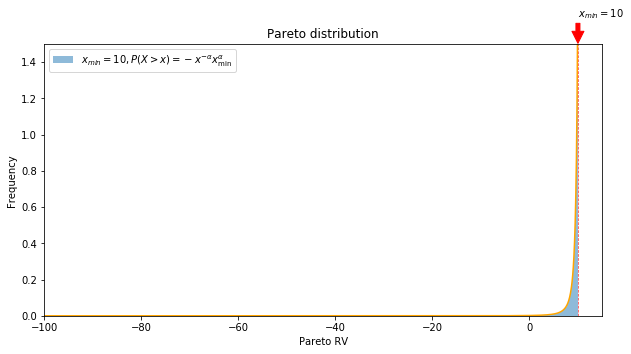

time: 22.6 s


In [197]:
#define pareto pdf 
def pareto_pdf(x,alpha, loc, scale):
    return (alpha / ((-x - loc) / scale)**(alpha+1)) /scale

alpha= 1.95
loc = -11
scale = 1
fig, ax = plt.subplots(figsize=(10,5))
r = - pareto.rvs(alpha,loc=loc, scale=scale, size=500000)
count, bins, ignored = plt.hist(r, bins=10000, density=True, alpha=0.5, label=r'$x_{min} = 10, P(X > x) = -x^{-\alpha} x_{\min }^{\alpha}$')
plt.plot(np.array([10]*1000),np.linspace(0,1.5, 1000), linestyle = '--', color='r', alpha=0.75, linewidth=0.75)
plt.plot(bins, pareto_pdf(bins, alpha, loc, scale), color='orange')
ax.set_xlim(-100,15)
ax.set_ylim(0,1.5)
ax.annotate(r'$x_{min} = 10$', 
            xy=(10, 1.5), 
            xytext=(10, 1.65), 
            arrowprops = dict(edgecolor='red',facecolor='red', shrink=0.03))
ax.set_xlabel('Pareto RV')
ax.set_ylabel('Frequency')
plt.title('Pareto distribution')
plt.legend()
plt.show()

Let's see how the sample mean converges to the true mean for the famous 80-20 Pareto distribution.

In [198]:
pareto_alpha = 1.15
Pareto_true_mean = -pareto_alpha/(pareto_alpha-1) - loc
print('Pareto 80-20 true mean: ', Pareto_true_mean)

Pareto 80-20 true mean:  3.3333333333333295
time: 1.99 ms


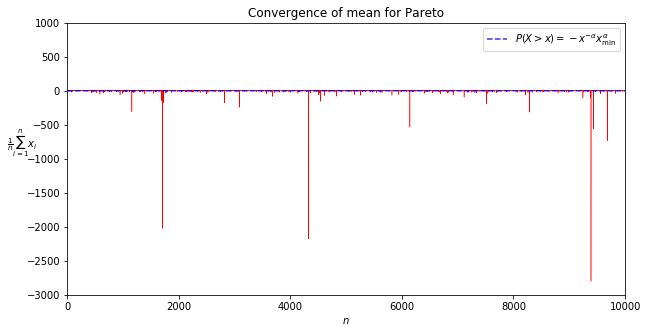

time: 3.22 s


In [241]:
means = []
pareto_alpha = 1.15
for n in range(1, 10000):
    distr = - pareto.rvs(pareto_alpha,loc=loc, scale=scale, size=n)
    means.append(np.mean(distr))
fig, ax = plt.subplots(figsize=(10,5))    
ax.plot(np.arange(1, 10000), means, linewidth=0.5, c='r')
ax.plot(np.arange(10000), np.array([Pareto_true_mean]*10000), linestyle='--', color='blue', alpha=0.8, label=r'$P(X > x) = -x^{-\alpha} x_{\min }^{\alpha}$')
ax.set_ylim(-3000, 1000)
ax.set_xlim(0, 10000)
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$\frac{1}{n}\sum_{i=1}^{n} x_{i}$', rotation=0)
plt.title('Convergence of mean for Pareto')
plt.legend()
plt.show()

In [200]:
means = np.array(means)
perc_above_mean = 100*len(means[means>Pareto_true_mean])/len(means)
print('Percentage of observations above mean: ', perc_above_mean)

Percentage of observations above mean:  86.65866586658666
time: 2.99 ms


We see that for $\alpha = 1.15$, ~90% of observations fall above the mean. __Fat tailed distributions hide the true mean!__

Let's go straight into evaluating $\mathbb{E}(P(K, M)) \simeq \gamma \mathbb{E}_{j}^{+} \frac{F_{j}^{+}}{1-F_{j}^{+}}$ for different measures of asymmetry $v_{j} \equiv \frac{F_{j}^{-}}{F_{j}^{+}}$ for different payoff parameters $\gamma$.

In [223]:
#set up parameters
gamma = 0.1
scale= 1
loc= -11
pareto_alpha = 1.15

# define power law pdf and expected value functions
power_law_pdf = lambda x: (pareto_alpha / ((-x - loc) / scale)**(pareto_alpha+1)) /scale
expected_val = lambda x: x*(pareto_alpha / ((-x - loc) / scale)**(pareto_alpha+1)) /scale

#define the payoff function
def Payoff(alpha, gamma=gamma, loc=loc, scale=scale):
    true_mean = -alpha/(alpha-1) - loc
    F_right = scipy.integrate.quad(power_law_pdf, true_mean, 10)[0]
    F_left = scipy.integrate.quad(power_law_pdf,-100000, true_mean)[0]
    expected_val_right = scipy.integrate.quad(expected_val, true_mean, 10)[0]/scipy.integrate.quad(power_law_pdf, true_mean, 10)[0]
    expected_val_left = scipy.integrate.quad(expected_val,-100000, true_mean)[0]/scipy.integrate.quad(power_law_pdf,-100000, true_mean)[0]
    
    return gamma*expected_val_right*F_right/(1-F_right)

alphas = np.linspace(1.1, 3, 1000)
payoffs_1 = []
payoffs_3 = []
payoffs_5 = []
payoffs_7 = []
payoffs_9 = []
for alph in alphas:
    payoffs_1.append(Payoff(alph, gamma=0.1))
    payoffs_3.append(Payoff(alph, gamma=0.3))
    payoffs_5.append(Payoff(alph, gamma=0.5))
    payoffs_7.append(Payoff(alph, gamma=0.7))
    payoffs_9.append(Payoff(alph, gamma=0.9))  
    
# set up the asymmetry measures
vs = []
for alpha in alphas:
    true_mean = -alpha/(alpha-1) - loc
    F_right = scipy.integrate.quad(f, true_mean, 10)[0]
    F_left = scipy.integrate.quad(f,-100000, true_mean)[0]
    vs.append(F_left/F_right)
vs = np.array(vs)

time: 7.04 s


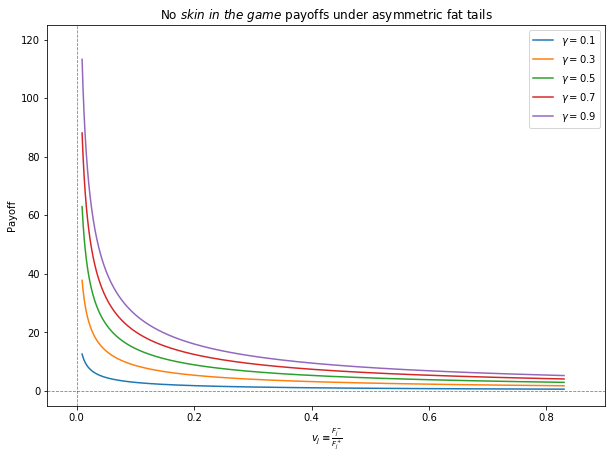

time: 349 ms


In [242]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(vs, payoffs_1, label=r'$\gamma = 0.1$')
ax.plot(vs, payoffs_3, label=r'$\gamma = 0.3$')
ax.plot(vs, payoffs_5, label=r'$\gamma = 0.5$')
ax.plot(vs, payoffs_7, label=r'$\gamma = 0.7$')
ax.plot(vs, payoffs_9, label=r'$\gamma = 0.9$')
ax.plot(np.array([0]*1000), np.linspace(-5, 125, 1000), linestyle='--', color='black', alpha=0.5, linewidth=0.8)
ax.plot(np.linspace(-0.05, 0.9, 1000),np.array([0]*1000), linestyle='--', color='black', alpha=0.5, linewidth=0.8)
ax.set_xlim(-0.05, 0.9)
ax.set_ylim(-5, 125)
ax.set_xlabel(r'$v_{j} \equiv \frac{F_{j}^{-}}{F_{j}^{+}}$')
ax.set_ylabel('Payoff')
plt.title('No $skin \ in \ the \ game$ payoffs under asymmetric fat tails')
plt.legend()
plt.show()

What do we see? The agent benefiting from "good"outcomes and not incurring the costs of "bad" ones, sees their expected payoff grow as $v_j$ decreases. This means the agent has an incentive to make the left tail longer thus accumulating risk and increasing the probability of a severe blowup!

### Conclusion

The discussed example shows the dangerous risk asymmetry in most decision making institutions and the agents running them and calls for an ancient heuristic as a remedy: __skin in the game__.

As Taleb puts it, "the heuristic implies that one should be the first consumer of one's product, a cook should test his own food, helicopter repairpersons should be ready to take random flights on the rotorcraft that they maintain, hedge fund managers should be maximally invested in their funds. But it does not naively imply that one should always be using one's product: a barber cannot cut his own hair, the maker of a cancer drug should not be a user of his product unless he is ill. So one should use one's products conditionally on being called to use them. However the rule is far more rigid in matters entailing systemic risks: simply some decisions should never be taken by a certain class of people."
For more details on the ethical and philosophical implications of the skin-in-the-game heuristic, refer to the [original paper](https://arxiv.org/pdf/1308.0958.pdf).